<a href="https://colab.research.google.com/github/remifol/SystematicReview/blob/master/Pr%C3%A9sentationResultats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import itertools
import os
import math
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
Path = 'drive/My Drive/Projet de maitrise/Revue systématique/Automatisation/Algorithme/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
SVM_BOW = pd.read_excel(Path+'BOW_output.xlsx', header = [0,1,2,3],index = 0, sheet_name='SVM BOW').transpose()
REGLOG_BOW = pd.read_excel(Path+'BOW_output.xlsx', header = [0,1,2,3],index = 0 , sheet_name='RegLog BOW').transpose()
BOW_WSS95 = pd.read_excel(Path+'BOW_WSS95.xlsx', header = [0,1,2],index = 0).transpose()

In [0]:
SVM_BOW

0         1         2  \
ACEInhibitors       0.1 SVM Accuracy     0.853774  0.919811  0.919811   
                            F1_score     0.162162  0.370370  0.413793   
                            Sensitivity  0.176471  0.312500  0.375000   
                            Specificity  0.912821  0.969388  0.964286   
                    0.3 SVM Accuracy     0.918110  0.885039  0.877165   
                            F1_score     0.350000  0.376068  0.315789   
                            Sensitivity  0.400000  0.385965  0.382979   
                            Specificity  0.948333  0.934256  0.916667   
                    0.5 SVM Accuracy     0.889309  0.877956  0.899716   
                            F1_score     0.380952  0.302703  0.263889   
                            Sensitivity  0.433735  0.318182  0.213483   
                            Specificity  0.928131  0.928793  0.962810   
                    0.7 SVM Accuracy     0.903378  0.893919  0.891892   
                            F1_score     0.386266  0.331915  0.316239   
                            Sensitivity  0.424528  0.336207  0.324561   
                            Specificity  0.940320  0.941349  0.939239   
ADHD                0.1 SVM Accuracy     0.868421  0.921053  0.960526   
                            F1_score     0.583333  0.625000  0.666667   
                            Sensitivity  0.583333  0.833333  0.600000   
                            Specificity  0.921875  0.928571  0.985915   
                    0.3 SVM Accuracy     0.867841  0.876652  0.911894   
                            F1_score     0.500000  0.461538  0.642857   
                            Sensitivity  0.600000  0.545455  0.782609   
                            Specificity  0.900990  0.912195  0.926471   
                    0.5 SVM Accuracy     0.864721  0.893899  0.870027   
                            F1_score     0.495050  0.523810  0.449438   
                            Sensitivity  0.675676  0.536585  0.512821   
                            Specificity  0.885294  0.937500  0.911243   
                    0.7 SVM Accuracy     0.859848  0.884470  0.842803   
                            F1_score     0.531646  0.534351  0.450331   
...                                           ...       ...       ...   
Triptans            0.1 SVM Sensitivity  0.500000  0.937500  0.785714   
                            Specificity  0.846154  0.702703  0.897436   
                    0.3 SVM Accuracy     0.761006  0.779874  0.798742   
                            F1_score     0.688525  0.660194  0.686275   
                            Sensitivity  0.677419  0.586207  0.700000   
                            Specificity  0.814433  0.891089  0.844037   
                    0.5 SVM Accuracy     0.754717  0.762264  0.743396   
                            F1_score     0.656085  0.666667  0.682243   
                            Sensitivity  0.632653  0.707865  0.839080   
                            Specificity  0.826347  0.789773  0.696629   
                    0.7 SVM Accuracy     0.692722  0.695418  0.733154   
                            F1_score     0.595745  0.647975  0.620690   
                            Sensitivity  0.636364  0.818898  0.623077   
                            Specificity  0.723849  0.631148  0.792531   
UrinaryIncontinence 0.1 SVM Accuracy     0.611111  0.833333  0.666667   
                            F1_score     0.363636  0.800000  0.250000   
                            Sensitivity  0.333333  0.857143  0.333333   
                            Specificity  0.750000  0.818182  0.733333   
                    0.3 SVM Accuracy     0.679245  0.773585  0.811321   
                            F1_score     0.451613  0.684211  0.772727   
                            Sensitivity  0.500000  0.684211  0.850000   
                            Specificity  0.743590  0.823529  0.787879   
                    0.5 SVM Accuracy     0.735632  0.735632  0.689655   
                            F1_sc

BOW_WSS95

In [0]:
group = pd.DataFrame()
group['SVM'] = REGLOG_BOW.xs(('0.7','RegLog','F1_score'), level=[1,2,3]).mean(axis=1)
group['NbArticles'] = BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
group['WSS95_num'] = BOW_WSS95.xs(('WSS95','RegLog'), level=[1,2])
group['WSS95'] = group['WSS95_num']/group['NbArticles']
group.head()

,F1SVM30,NbArticles,WSS95_num,WSS95
ACEInhibitors,0.309828,2114,1386,0.655629
ADHD,0.526738,754,259,0.343501
Antihistamines,0.450647,185,152,0.821622
AtypicalAntipsychotics,0.530269,922,702,0.761388
BetaBlockers,0.353403,1807,1242,0.687327


In [0]:
[plt.cm.get_cmap('rainbow')(i/15) for i in range(15)]

[(0.5, 0.0, 1.0, 1.0),
 (0.3666666666666667, 0.20791169081775931, 0.9945218953682733, 1.0),
 (0.23333333333333334, 0.40673664307580015, 0.9781476007338057, 1.0),
 (0.09999999999999998, 0.5877852522924731, 0.9510565162951535, 1.0),
 (0.033333333333333326, 0.7431448254773941, 0.9135454576426009, 1.0),
 (0.16666666666666663, 0.8660254037844386, 0.8660254037844387, 1.0),
 (0.30000000000000004, 0.9510565162951535, 0.8090169943749475, 1.0),
 (0.43333333333333335, 0.9945218953682733, 0.7431448254773942, 1.0),
 (0.5666666666666667, 0.9945218953682734, 0.6691306063588582, 1.0),
 (0.7, 0.9510565162951536, 0.5877852522924731, 1.0),
 (0.8333333333333333, 0.8660254037844387, 0.5000000000000001, 1.0),
 (0.9666666666666666, 0.7431448254773945, 0.4067366430758004, 1.0),
 (1.0, 0.5877852522924732, 0.30901699437494745, 1.0),
 (1.0, 0.40673664307580004, 0.20791169081775923, 1.0),
 (1.0, 0.20791169081775931, 0.10452846326765346, 1.0)]

In [0]:
SN = REGLOG_BOW.xs(('0.5','RegLog','Specificity'), level=[1,2,3])
SN['WSS95'] = 1 - BOW_WSS95.xs(('WSS95','RegLog'), level=[1,2])/BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
SN['size'] = BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
SN['color'] = [plt.cm.get_cmap('rainbow')(i/15) for i in range(15)]

SP = REGLOG_BOW.xs(('0.5','RegLog','Sensitivity'), level=[1,2,3])
SP['WSS95'] = 1 - BOW_WSS95.xs(('WSS95','RegLog'), level=[1,2])/BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
SP['size'] = BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
SP['color'] = [plt.cm.get_cmap('rainbow')(i/15) for i in range(15)]

AttributeError: ignored

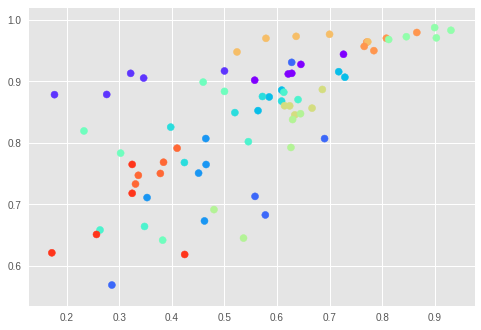

In [93]:
plt.scatter(1-SP[0],SN[0],c=result['color'])
plt.scatter(1-SP[1],SN[1],c=result['color'])
plt.scatter(1-SP[2],SN[2],c=result['color'])
plt.scatter(1-SP[3],SN[3],c=result['color'])
plt.scatter(1-SP[4],SN[4],c=result['color'])
plt.set_ylim(0,1.2)
plt.set_xlim(0,1.2)

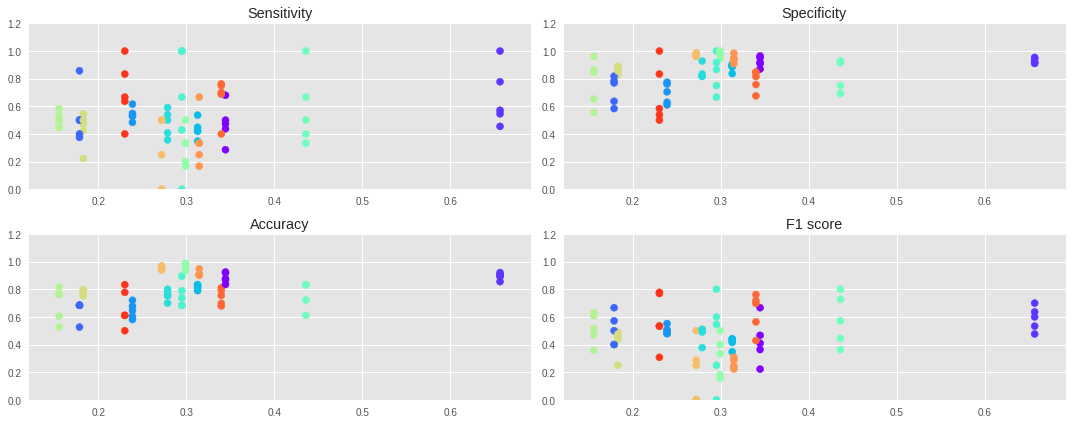

In [0]:
#Plot function
plt.style.use('ggplot')

fig, ax = plt.subplots(2,2, figsize=(15, 6), facecolor='w', edgecolor='k')


titles = ('Sensitivity',
          'Specificity',
          'Accuracy',
          'F1 score')

frac = 0.3

ax = ax.ravel()

color = 'tab:black'

result = REGLOG_BOW.xs(('0.1','RegLog','Sensitivity'), level=[1,2,3])
result['WSS95'] = 1 - BOW_WSS95.xs(('WSS95','RegLog'), level=[1,2])/BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
result['size'] = BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
result['color'] = [plt.cm.get_cmap('rainbow')(i/15) for i in range(15)]
ax[0].set_title(titles[0])
ax[0].scatter(result['WSS95'],result[0],c=result['color'])
ax[0].scatter(result['WSS95'],result[1],c=result['color'])
ax[0].scatter(result['WSS95'],result[2],c=result['color'])
ax[0].scatter(result['WSS95'],result[3],c=result['color'])
ax[0].scatter(result['WSS95'],result[4],c=result['color'])
ax[0].set_ylim(0,1.2)

result = REGLOG_BOW.xs(('0.1','RegLog','Specificity'), level=[1,2,3])
result['WSS95'] = 1 - BOW_WSS95.xs(('WSS95','RegLog'), level=[1,2])/BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
result['size'] = BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
result['color'] = [plt.cm.get_cmap('rainbow')(i/15) for i in range(15)]
ax[1].set_title(titles[1])
ax[1].scatter(result['WSS95'],result[0],c=result['color'])
ax[1].scatter(result['WSS95'],result[1],c=result['color'])
ax[1].scatter(result['WSS95'],result[2],c=result['color'])
ax[1].scatter(result['WSS95'],result[3],c=result['color'])
ax[1].scatter(result['WSS95'],result[4],c=result['color'])
ax[1].set_ylim(0,1.2)

result = REGLOG_BOW.xs(('0.1','RegLog','Accuracy'), level=[1,2,3])
result['WSS95'] = 1 - BOW_WSS95.xs(('WSS95','RegLog'), level=[1,2])/BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
result['size'] = BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
result['color'] = [plt.cm.get_cmap('rainbow')(i/15) for i in range(15)]
ax[2].set_title(titles[2])
ax[2].scatter(result['WSS95'],result[0],c=result['color'])
ax[2].scatter(result['WSS95'],result[1],c=result['color'])
ax[2].scatter(result['WSS95'],result[2],c=result['color'])
ax[2].scatter(result['WSS95'],result[3],c=result['color'])
ax[2].scatter(result['WSS95'],result[4],c=result['color'])
ax[2].set_ylim(0,1.2)

result = REGLOG_BOW.xs(('0.1','RegLog','F1_score'), level=[1,2,3])
result['WSS95'] = 1 - BOW_WSS95.xs(('WSS95','RegLog'), level=[1,2])/BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
result['size'] = BOW_WSS95.xs(('NbArticles','SVM'), level=[1,2])
result['color'] = [plt.cm.get_cmap('rainbow')(i/15) for i in range(15)]
ax[3].set_title(titles[3])
ax[3].scatter(result['WSS95'],result[0],c=result['color'])
ax[3].scatter(result['WSS95'],result[1],c=result['color'])
ax[3].scatter(result['WSS95'],result[2],c=result['color'])
ax[3].scatter(result['WSS95'],result[3],c=result['color'])
ax[3].scatter(result['WSS95'],result[4],c=result['color'])
ax[3].set_ylim(0,1.2)


#ax1.legend(loc='right')
fig.tight_layout()
plt.show()

In [0]:
plt.cm.get_cmap('rainbow', 10)

TypeError: ignored

Text(0, 0.5, 'sepal width (cm)')

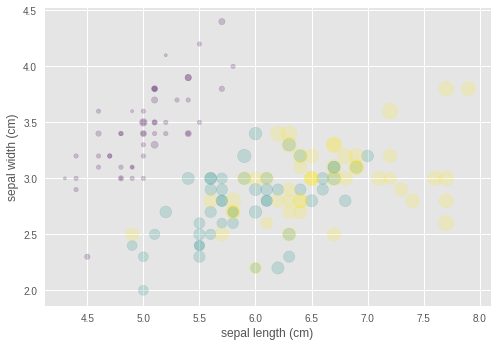

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

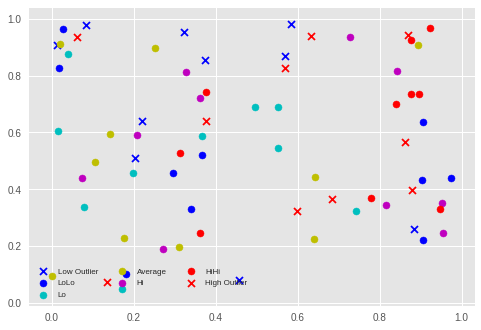

In [0]:
import matplotlib.pyplot as plt
from numpy.random import random

colors = ['b', 'c', 'y', 'm', 'r']

lo = plt.scatter(random(10), random(10), marker='x', color=colors[0])
ll = plt.scatter(random(10), random(10), marker='o', color=colors[0])
l  = plt.scatter(random(10), random(10), marker='o', color=colors[1])
a  = plt.scatter(random(10), random(10), marker='o', color=colors[2])
h  = plt.scatter(random(10), random(10), marker='o', color=colors[3])
hh = plt.scatter(random(10), random(10), marker='o', color=colors[4])
ho = plt.scatter(random(10), random(10), marker='x', color=colors[4])

plt.legend((lo, ll, l, a, h, hh, ho),
           ('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

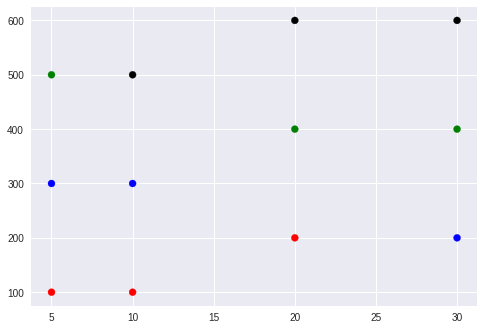

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

carat = [5, 10, 20, 30, 5, 10, 20, 30, 5, 10, 20, 30]
price = [100, 100, 200, 200, 300, 300, 400, 400, 500, 500, 600, 600]
color =['D', 'D', 'D', 'E', 'E', 'E', 'F', 'F', 'F', 'G', 'G', 'G',]

df = pd.DataFrame(dict(carat=carat, price=price, color=color))

fig, ax = plt.subplots()

colors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}

ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))

plt.show()

In [0]:
REGLOG_BOW.xs(('0.7','RegLog','F1_score'), level=[1,2,3])

,0,1,2,3,4
ACEInhibitors,0.336700,0.296578,0.284444,0.314516,0.316901
ADHD,0.556291,0.535032,0.562963,0.460317,0.519084
Antihistamines,0.545455,0.417582,0.361111,0.436782,0.492308
AtypicalAntipsychotics,0.471111,0.572650,0.519417,0.534247,0.553922
BetaBlockers,0.382284,0.389027,0.318043,0.375335,0.302326
CalciumChannelBlockers,0.484330,0.544974,0.490385,0.432432,0.461059
Estrogens,0.370370,0.388889,0.400000,0.436364,0.375000
NSAIDS,0.477273,0.606061,0.725275,0.571429,0.659341
Opiods,0.127660,0.131148,0.162162,0.080000,0.089552
OralHypoglycemics,0.407895,0.425532,0.374269,0.409091,0.450867


0          0.474505
1          0.463668
2          0.461327
3          0.447633
4          0.475413
average         NaN
dtype: float64